In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
from keras.preprocessing.image import load_img, array_to_img, img_to_array
from sklearn.model_selection import train_test_split

In [2]:
ptrain= str('train'+'\\')
ptrainc= str('train_cleaned'+'\\')
ptest= str('test'+'\\')
train = sorted(os.listdir('train'))
train_clean = sorted(os.listdir('train_cleaned'))
test = sorted(os.listdir('test'))

In [3]:
train_imgs = []
val_imgs = []
test_imgs = []

for img in train:
    #Reduzir a dimensionalidade utilizando Grayscale
    img = load_img(ptrain+img, color_mode= 'grayscale', target_size = (420,540))
    img = img_to_array(img).astype('float32')/255
    train_imgs.append(img)

for img in train_clean:
    img = load_img(ptrainc+img, color_mode= 'grayscale', target_size = (420,540))
    img = img_to_array(img).astype('float32')/255
    val_imgs.append(img)

for img in test:
    img = load_img(ptest+img, color_mode= 'grayscale',target_size = (420,540))
    img = img_to_array(img).astype('float32')/255
    test_imgs.append(img)
    
train_imgs = np.array(train_imgs)
val_imgs = np.array(val_imgs)
test_imgs = np.array(test_imgs)

In [4]:
def Autoencoder():
    input_img = keras.layers.Input(shape=(420,540,1), name='input_img')
    
    #Encoder
    x=keras.layers.Conv2D(32,(3,3), activation = 'relu', padding = 'same', name = 'Conv1' )(input_img)
    x=keras.layers.MaxPooling2D((2,2), padding='same', name = 'pool1' )(x)
    x=keras.layers.Conv2D(16,(3,3), activation = 'relu', padding = 'same', name = 'Conv2' )(x)
    x=keras.layers.MaxPooling2D((2,2), padding='same', name = 'pool2' )(x)

    #Decoder
    x=keras.layers.Conv2D(16, (3,3), activation = 'relu', padding = 'same', name = 'Conv3' )(x)
    x=keras.layers.UpSampling2D((2,2), name='upsample1')(x)
    x=keras.layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same', name = 'Conv4' )(x)
    x=keras.layers.UpSampling2D((2,2), name='upsample2')(x)
    
    #Activation
    x=keras.layers.Conv2D(1, (3,3), activation = 'sigmoid', padding = 'same', name = 'Conv5')(x)
    
    autoencoder = keras.models.Model(inputs = input_img, outputs= x)
    autoencoder.compile(optimizer = 'Adam', loss = 'binary_crossentropy')
    
    return autoencoder
    

In [6]:
autoencoder = Autoencoder()
autoencoder.fit(train_imgs, val_imgs, epochs=50, batch_size = 8)

Epoch 1/50
18/18 [==============================] - 67s 4s/step - loss: 0.5424
Epoch 2/50
18/18 [==============================] - 55s 3s/step - loss: 0.3640
Epoch 3/50
18/18 [==============================] - 50s 3s/step - loss: 0.3456
Epoch 4/50
18/18 [==============================] - 50s 3s/step - loss: 0.3272
Epoch 5/50
18/18 [==============================] - 49s 3s/step - loss: 0.2718
Epoch 6/50
18/18 [==============================] - 47s 3s/step - loss: 0.2422
Epoch 7/50
18/18 [==============================] - 47s 3s/step - loss: 0.2328
Epoch 8/50
18/18 [==============================] - 47s 3s/step - loss: 0.2180
Epoch 9/50
18/18 [==============================] - 47s 3s/step - loss: 0.2020
Epoch 10/50
18/18 [==============================] - 48s 3s/step - loss: 0.1944
Epoch 11/50
18/18 [==============================] - 53s 3s/step - loss: 0.1879
Epoch 12/50
18/18 [==============================] - 48s 3s/step - loss: 0.1798
Epoch 13/50
18/18 [==============================

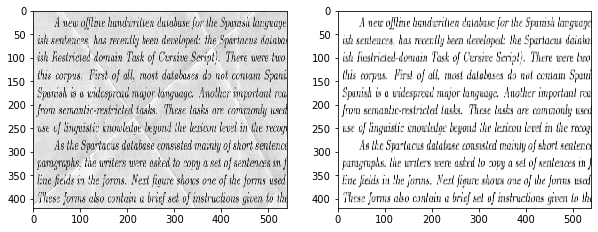

In [24]:
test_img1 = np.expand_dims(test_imgs[50], axis=0)
predicted_test1 = np.squeeze(autoencoder.predict(test_img))
f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.squeeze(test_imgs[50]), cmap='gray')
ax[1].imshow(np.squeeze(predicted_test1.astype('float')), cmap='gray')
plt.show()

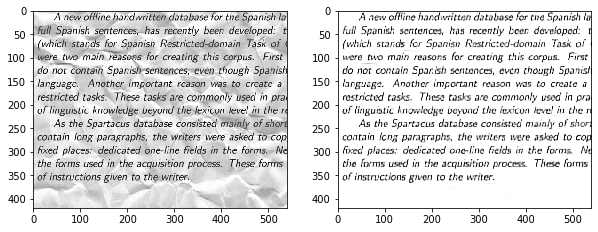

In [27]:
test_img2 = np.expand_dims(test_imgs[30], axis=0)
predicted_test2 = np.squeeze(autoencoder.predict(test_img2))
f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.squeeze(test_imgs[30]), cmap='gray')
ax[1].imshow(np.squeeze(predicted_test2.astype('float')), cmap='gray')
plt.show()

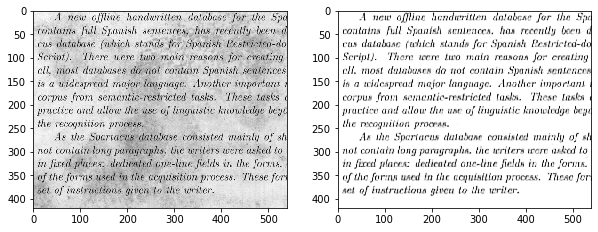

In [28]:
test_img3 = np.expand_dims(test_imgs[20], axis=0)
predicted_test3 = np.squeeze(autoencoder.predict(test_img3))
f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.squeeze(test_imgs[20]), cmap='gray')
ax[1].imshow(np.squeeze(predicted_test3.astype('float')), cmap='gray')
plt.show()

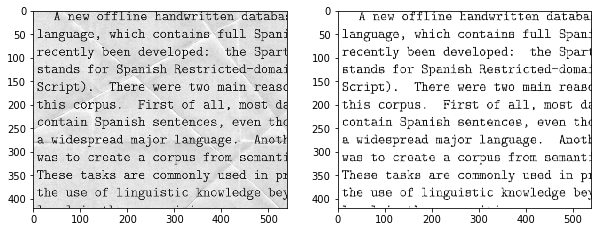

In [31]:
test_img4 = np.expand_dims(test_imgs[15], axis=0)
predicted_test4 = np.squeeze(autoencoder.predict(test_img4))
f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.squeeze(test_imgs[15]), cmap='gray')
ax[1].imshow(np.squeeze(predicted_test4.astype('float')), cmap='gray')
plt.show()

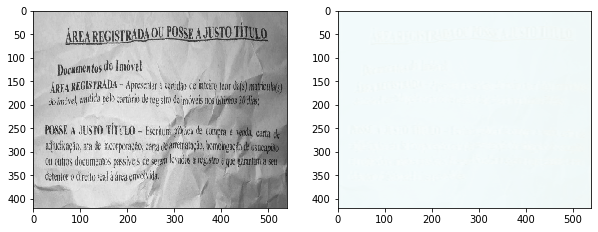

In [36]:
testezinho = load_img('teste1.jpeg', color_mode = 'grayscale', target_size = (420,540))
testezinho = img_to_array(testezinho).astype('float32')/255
testezinho = np.array(testezinho)
test_img5= np.expand_dims(testezinho, axis=0)
predicted_test5 = np.squeeze(autoencoder.predict(testezinho))
f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.squeeze(testezinho), cmap='gray')
ax[1].imshow(np.squeeze(predicted_test5.astype('float')), cmap='gray')
plt.show()